#Analiza podataka
Ovi podaci su uzeti sa sajta "https://www.openbrewerydb.org/breweries" i oni u sustini predstavljaju pivare u drzavama (najvise iz Amerike) i ukljucuje podatke kao sto su u kojoj drzavi i gradu se nalazi ta pivara i takodje koji je tip pivare.


In [0]:
# File location and type
file_location = "/FileStore/beer1.csv"
#file_location = "/FileStore/kafka_data_got-1.csv"
#/dbfs/FileStore/kafka_data_got.csv
file_type = "csv"
# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)
# Create a view or table

temp_table_name = "kafka_beer_csv"

df.createOrReplaceTempView(temp_table_name)

id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,longitude,latitude,phone,website_url,state,street
5128df48-79fc-4f0f-8b52-d06be54d0cec,(405) Brewing Co,micro,1716 Topeka St,null,null,Norman,Oklahoma,73069-8224,United States,-97.46818222,35.25738891,4058160490,http://www.405brewing.com,Oklahoma,1716 Topeka St
9c5a66c8-cc13-416f-a5d9-0a769c87d318,(512) Brewing Co,micro,407 Radam Ln Ste F200,null,null,Austin,Texas,78745-1197,United States,null,null,5129211545,http://www.512brewing.com,Texas,407 Radam Ln Ste F200
34e8c68b-6146-453f-a4b9-1f6cd99a5ada,1 of Us Brewing Company,micro,8100 Washington Ave,null,null,Mount Pleasant,Wisconsin,53406-3920,United States,-87.88336350209435,42.72010826899558,2624847553,https://www.1ofusbrewing.com,Wisconsin,8100 Washington Ave
ef970757-fe42-416f-931d-722451f1f59c,10 Barrel Brewing Co,large,1501 E St,null,null,San Diego,California,92101-6618,United States,-117.129593,32.714813,6195782311,http://10barrel.com,California,1501 E St
6d14b220-8926-4521-8d19-b98a2d6ec3db,10 Barrel Brewing Co,large,62970 18th St,null,null,Bend,Oregon,97701-9847,United States,-121.281706,44.08683531,5415851007,http://www.10barrel.com,Oregon,62970 18th St
e2e78bd8-80ff-4a61-a65c-3bfbd9d76ce2,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,null,null,Bend,Oregon,97703-2465,United States,-121.3288021,44.0575649,5415851007,null,Oregon,1135 NW Galveston Ave Ste B
e432899b-7f58-455f-9c7b-9a6e2130a1e0,10 Barrel Brewing Co,large,1411 NW Flanders St,null,null,Portland,Oregon,97209-2620,United States,-122.6855056,45.5259786,5032241700,http://www.10barrel.com,Oregon,1411 NW Flanders St
9f1852da-c312-42da-9a31-097bac81c4c0,10 Barrel Brewing Co - Bend Pub,large,62950 NE 18th St,null,null,Bend,Oregon,97701,United States,-121.2809536,44.0912109,5415851007,null,Oregon,62950 NE 18th St
ea4f30c0-bce6-416b-8904-fab4055a7362,10 Barrel Brewing Co - Boise,large,826 W Bannock St,null,null,Boise,Idaho,83702-5857,United States,-116.202929,43.618516,2083445870,http://www.10barrel.com,Idaho,826 W Bannock St
1988eb86-f0a2-4674-ba04-02454efa0d31,10 Barrel Brewing Co - Denver,large,2620 Walnut St,null,null,Denver,Colorado,80205-2231,United States,-104.9853655,39.7592508,7205738992,null,Colorado,2620 Walnut St



Ovde smo pokazali 15 gradova koji imaju najvise pivara. Ovo smo uradili tako sto smo brojali gradove u kome se nalazi te pivare.

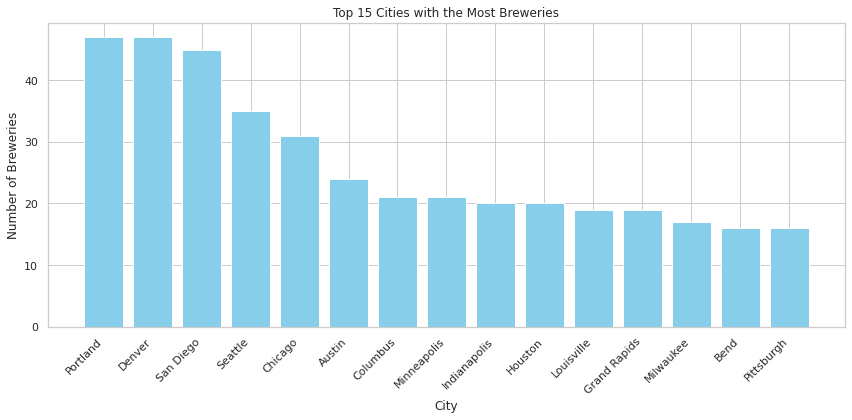

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import desc
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder.appName("BreweryAnalysis").getOrCreate()

# Replace the file_path with your actual file path
file_path = "/FileStore/beer1.csv"

# Load the data into a PySpark DataFrame
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Aggregate the count of breweries by city
breweries_by_city = df.groupBy("city").count().orderBy(desc("count")).limit(15)

# Extract the city names and counts
cities = [row['city'] for row in breweries_by_city.collect()]
counts = [row['count'] for row in breweries_by_city.collect()]

# Create a bar graph for the top 15 cities
plt.figure(figsize=(12, 6))
plt.bar(cities, counts, color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Breweries')
plt.title('Top 15 Cities with the Most Breweries')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()



Ovde smo pokazali procenat tipove pivara. Uradili smo tako sto smo brojali tip pivara i uradili njihov procenat.

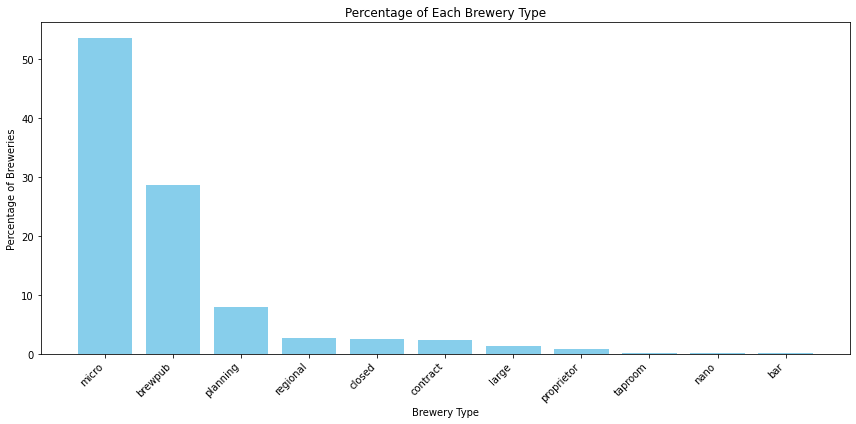

In [0]:
from pyspark.sql.functions import desc, col
import matplotlib.pyplot as plt

# Aggregate the count of breweries by brewery_type
brewery_type_counts = df.groupBy("brewery_type").count()

# Calculate the total number of breweries
total_breweries = df.count()

# Calculate the percentage for each brewery_type
brewery_type_counts = brewery_type_counts.withColumn("percentage", (col("count") / total_breweries) * 100)

# Sort the results by count in descending order
brewery_type_counts = brewery_type_counts.orderBy(desc("count"))

# Extract brewery_type names, counts, and percentages
brewery_types = [row['brewery_type'] for row in brewery_type_counts.collect()]
counts = [row['count'] for row in brewery_type_counts.collect()]
percentages = [row['percentage'] for row in brewery_type_counts.collect()]

# Create a bar graph for the brewery types
plt.figure(figsize=(12, 6))
plt.bar(brewery_types, percentages, color='skyblue')
plt.xlabel('Brewery Type')
plt.ylabel('Percentage of Breweries')
plt.title('Percentage of Each Brewery Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()



Ovde smo pokazali procenat tipova pivara u 15 gradova gde su pivare najzastupljenije.

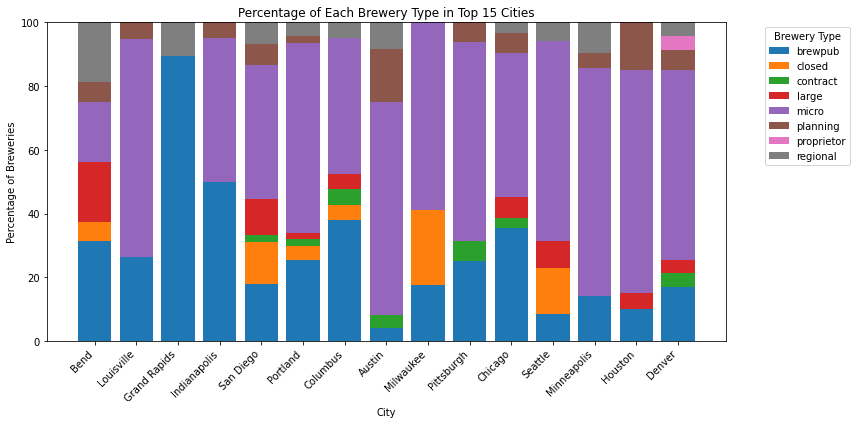

In [0]:
from pyspark.sql.functions import desc, col
import matplotlib.pyplot as plt

# Get the top 15 cities with the most breweries
top_cities = df.groupBy("city").count().orderBy(desc("count")).limit(15).select("city").collect()

# Filter the DataFrame to include only the top 15 cities
df_top_cities = df.filter(col("city").isin([row.city for row in top_cities]))

# Calculate the total number of breweries in the top 15 cities
total_breweries_top_cities = df_top_cities.count()

# Aggregate the count of breweries by city and brewery type
breweries_by_city_type = df_top_cities.groupBy("city", "brewery_type").count()

# Calculate the percentage for each brewery type in each city
breweries_by_city_type = breweries_by_city_type.withColumn("percentage", (col("count") / total_breweries_top_cities) * 100)

# Pivot the DataFrame to have brewery types as columns
pivot_df = breweries_by_city_type.groupBy("city").pivot("brewery_type").sum("percentage").fillna(0)

# Extract data for plotting
cities = [row['city'] for row in pivot_df.collect()]
brewery_types = pivot_df.columns[1:]  # Exclude the 'city' column
percentage_data = [[row[brewery_type] for brewery_type in brewery_types] for row in pivot_df.collect()]

# Normalize percentages to ensure the sum is 100% for each city
normalized_percentage_data = [
    [percentage / sum(row) * 100 if sum(row) != 0 else 0 for percentage in row]
    for row in percentage_data
]

# Sort brewery types in ascending order
brewery_types = sorted(brewery_types)

# Create a stacked bar graph
plt.figure(figsize=(12, 6))
bottoms = [0] * len(cities)

for i, brewery_type in enumerate(brewery_types):
    # Use normalized_percentage_data
    percentages = [data[i] for data in normalized_percentage_data]
    plt.bar(cities, percentages, bottom=bottoms, label=brewery_type)
    bottoms = [sum(x) for x in zip(bottoms, percentages)]

plt.xlabel('City')
plt.ylabel('Percentage of Breweries')
plt.title('Percentage of Each Brewery Type in Top 15 Cities')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Brewery Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()



Ovde smo uradili procenat tipova pivara po drzavama.

Out[42]: <matplotlib.legend.Legend at 0x7f54d4820040><Figure size 2880x1800 with 0 Axes>

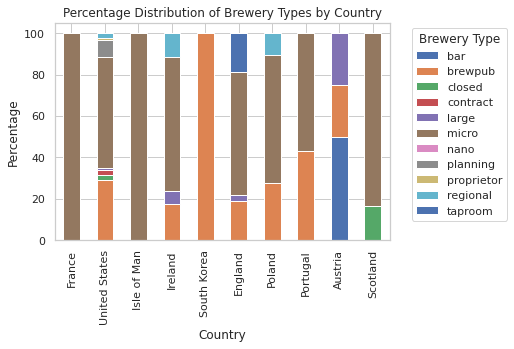

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, trim
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded the data and created a temporary table
temp_table_name = "kafka_beer_csv"

# Group by country, brewery type, then calculate the count for each group
grouped_df = spark.sql("""
    SELECT TRIM(country) as country, brewery_type, COUNT(*) as count
    FROM {temp_table_name}
    GROUP BY TRIM(country), brewery_type
""".format(temp_table_name=temp_table_name))

# Calculate the total count of breweries per country
total_per_country = grouped_df.groupBy("country").agg({"count": "sum"}).withColumnRenamed("sum(count)", "total_count")

# Join the grouped data with the total count per country
result_df = grouped_df.join(total_per_country, "country")

# Calculate the percentage for each brewery type in each country
result_df = result_df.withColumn("percentage", col("count") / col("total_count") * 100)

# Pivot the data to have brewery types as columns
pivoted_df = result_df.groupBy("country").pivot("brewery_type").agg({"percentage": "first"}).fillna(0)

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
result_pandas_df = pivoted_df.toPandas()

# Set up Seaborn for better visualizations
sns.set(style="whitegrid")

# Plot using Seaborn with a larger figsize
plt.figure(figsize=(40, 25))
result_pandas_df.set_index('country').plot(kind='bar', stacked=True)
plt.title("Percentage Distribution of Brewery Types by Country")
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.legend(title='Brewery Type', bbox_to_anchor=(1.05, 1), loc='upper left')



